# Comments Sentiment

## Task 1. Load data from the files

In [220]:
%matplotlib inline
#include libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import neurolab as nl

# import pybrain as pb
# from pybrain.tools.shortcuts import buildNetwork
# from pybrain.structure import TanhLayer
# from pybrain.datasets import SupervisedDataSet
# from pybrain.supervised.trainers import BackpropTrainer

#SkLearn 
from numpy import linalg
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Step 1. Initialization Step

In [221]:
picture_width = 18
picture_height = 5
#
forecast_horizon = 96
planning_horizon_interval = 2
training_set_points = forecast_horizon * planning_horizon_interval
amount_records = 199
amount_directions = 20

## Step 1.1 Load Data

In [12]:
path_to_data = '/users/tranhieu/Desktop/Bachelor/Data/'
path_to_figures = '/users/tranhieu/Desktop/Bachelor/Data/'

posts = pd.read_csv( path_to_data + 'vector_clustering_positive_200posts.csv', index_col=False, header=None)

load_data = []

for i in range(1):
    load_data[len(load_data):] = [ pd.read_csv( path_to_data + 'vector_clustering_positive_200posts.csv', index_col=False, header=None) ]

load_data[0].head(amount_records)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Christie endorses Trump in shock move,0.1709,0.1347,0.1341,0.1340,0.1333,0.1348,0.1362,0.1366,0.1389,...,0.1407,0.1408,0.1413,0.1414,0.1437,0.1481,0.1523,0.1584,0.1583,0.1604
1,Cruz and Robio attrack Trump in US election de...,0.1243,0.1543,0.1444,0.1417,0.1396,0.1393,0.1398,0.1374,0.1358,...,0.1329,0.1352,0.1371,0.1362,0.1366,0.1377,0.1364,0.1361,0.1351,0.1345
2,US election: Highlights from the Republican de...,0.3286,0.1921,0.1701,0.1589,0.1546,0.1449,0.1545,0.1588,0.1614,...,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460
3,US election 2016: Republicans to battle in Tex...,0.3478,0.2241,0.1846,0.1615,0.1530,0.1454,0.1353,0.1264,0.1323,...,0.1216,0.1206,0.1164,0.1224,0.1184,0.1200,0.1190,0.1156,0.1156,0.1156
4,US election 2016: Did socialism save this US t...,0.0995,0.1129,0.1213,0.1146,0.1122,0.1117,0.1097,0.1124,0.1180,...,0.1188,0.1171,0.1159,0.1148,0.1162,0.1150,0.1139,0.1128,0.1175,0.1164
5,US election 2016: Trump wins big in Nevada,0.1858,0.1799,0.1725,0.1652,0.1593,0.1572,0.1602,0.1587,0.1579,...,0.1598,0.1608,0.1609,0.1591,0.1588,0.1590,0.1591,0.1578,0.1568,0.1581
6,US election 2016: Jeb Bush drops out of Republ...,0.1703,0.1475,0.1502,0.1463,0.1425,0.1414,0.1458,0.1530,0.1564,...,0.1586,0.1618,0.1673,0.1710,0.1690,0.1678,0.1673,0.1694,0.1687,0.1671
7,US Election: Jeb Bush drops out of presidentia...,0.0483,0.1404,0.1401,0.1615,0.1691,0.1717,0.1664,0.1614,0.1582,...,0.1634,0.1621,0.1621,0.1568,0.1543,0.1604,0.1643,0.1609,0.1579,0.1579
8,US Election: Donald Trump wins in South Carolina,0.1802,0.1491,0.1462,0.1458,0.1425,0.1407,0.1389,0.1387,0.1441,...,0.1443,0.1455,0.1447,0.1442,0.1426,0.1424,0.1428,0.1421,0.1435,0.1453
9,US election 2016: Hillary Clinton 'wins Nevada...,0.1925,0.1946,0.2070,0.1955,0.1910,0.1888,0.1846,0.1809,0.1781,...,0.1801,0.1791,0.1762,0.1736,0.1711,0.1717,0.1716,0.1721,0.1723,0.1757


## Step 1.2 Explore the time series. Visualising.

In [209]:
# Tesing read data
load_data[0][0:1][1]
# Get list
list_post = [None] * len(load_data[0])
for j in range(len(list_post)):
    list_post[j] = []
    for i in range(1,amount_directions + 1):
        list_post[j].append(load_data[0][j:j+1][i])
# Get vectors from posts data
post_vector = []
for i in range(len(list_post)):
    post_vector.append([])
    for j in range(amount_directions):
        post_vector[i].append(list_post[i][j][i])
print(post_vector)


[[0.1709, 0.13469999999999999, 0.1341, 0.13400000000000001, 0.1333, 0.1348, 0.13619999999999999, 0.1366, 0.1389, 0.13819999999999999, 0.14069999999999999, 0.14080000000000001, 0.14130000000000001, 0.1414, 0.14369999999999999, 0.14810000000000001, 0.15229999999999999, 0.15840000000000001, 0.1583, 0.16039999999999999], [0.12429999999999999, 0.15429999999999999, 0.1444, 0.14169999999999999, 0.1396, 0.13930000000000001, 0.13980000000000001, 0.13739999999999999, 0.1358, 0.13500000000000001, 0.13289999999999999, 0.13519999999999999, 0.1371, 0.13619999999999999, 0.1366, 0.13769999999999999, 0.13639999999999999, 0.1361, 0.1351, 0.13450000000000001], [0.3286, 0.19209999999999999, 0.1701, 0.15890000000000001, 0.15459999999999999, 0.1449, 0.1545, 0.1588, 0.16139999999999999, 0.15329999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.14599999999999999, 0.1459999999999

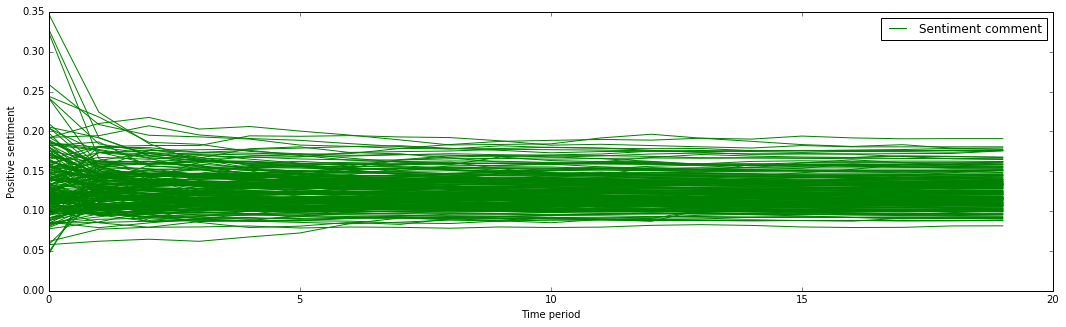

In [211]:
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
plt.plot(post_vector[0], 'g-', label = 'Sentiment comment')
for i in range(1,len(post_vector)):
    plt.plot(post_vector[i], 'g-')
plt.xlabel('Time period')
plt.ylabel('Positive sentiment')
plt.legend(loc = 'upper right')
plt.savefig(path_to_figures + 'pos_sentiment.png')

### Clustering

False
Silhouette Coefficient (K Means): 0.525
Silhouette Coefficient (MB Means): 0.508


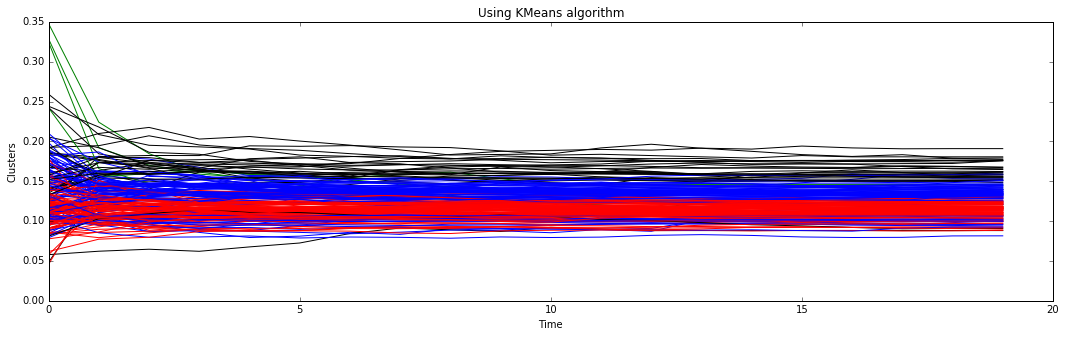

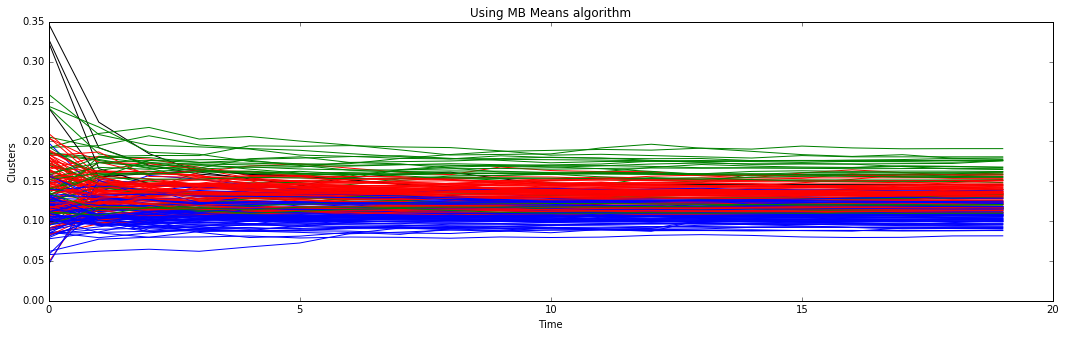

In [224]:
patterns = np.array(post_vector)
patterns.shape = (amount_records, amount_directions)

#eliminate the masks
mask = np.isnan(patterns)
patterns[mask] = patterns[0][0]

number_of_clusters = len(patterns)

n_clusters_en = 5

pt = patterns[:number_of_clusters:]

#K means
k_means_en = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
t0 = time.time()
k_means_en.fit(pt)
t_batch = time.time() - t0

k_means_labels_en = k_means_en.labels_
k_means_cluster_centers_en = k_means_en.cluster_centers_
k_means_labels_unique_en = np.unique(k_means_labels_en)


#MBK
batch_size = 45
mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters_en, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(pt)
t_mini_batch = time.time() - t0
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)


# Plot result

fig = plt.figure(figsize=(3, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.


print (np.isnan(np.min(post_vector)))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if k_means_labels_en[i] == 0:
        clr = 'r-'

    if k_means_labels_en[i] == 1:
        clr = 'b-'
        
    if k_means_labels_en[i] == 2:
        clr = 'g-'
        
    if k_means_labels_en[i] == 3:
        clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')
plt.title('Using KMeans algorithm')

#MBK
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if mbk_means_labels[i] == 0:
        clr = 'r-'

    if mbk_means_labels[i] == 1:
        clr = 'b-'
        
    if mbk_means_labels[i] == 2:
        clr = 'g-'
        
    if mbk_means_labels[i] == 3:
        clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')
plt.title('Using MB Means algorithm')

print("Silhouette Coefficient (K Means): %0.3f"
      % metrics.silhouette_score(pt, k_means_labels_en, metric='sqeuclidean'))

print("Silhouette Coefficient (MB Means): %0.3f"
      % metrics.silhouette_score(pt, mbk_means_labels, metric='sqeuclidean'))

len(k_means_labels_en) 199
len(mbk_means_labels) 199


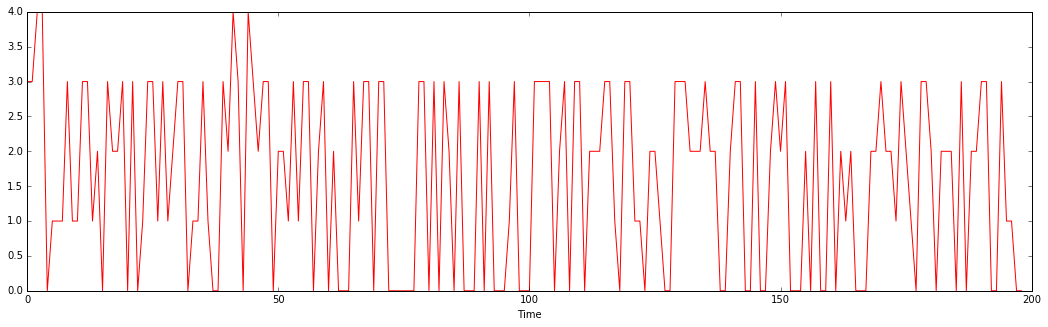

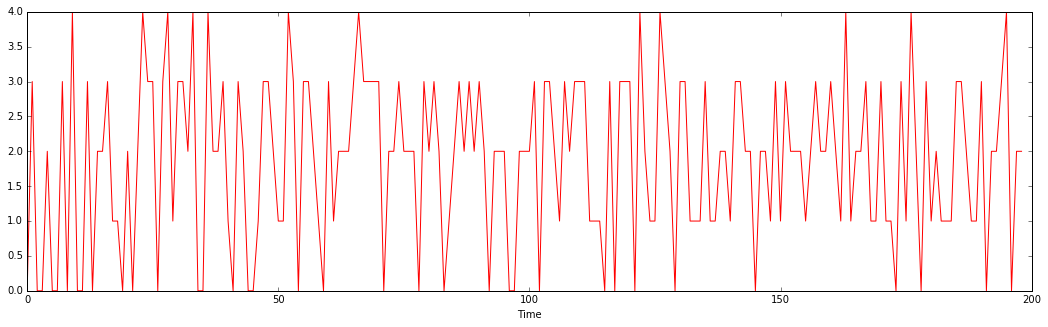

In [217]:
print ('len(k_means_labels_en)' , len(k_means_labels_en))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r-'
plt.plot(k_means_labels_en, clr, label = 'Label')    
plt.xlabel('Time')


print ('len(mbk_means_labels)' , len(mbk_means_labels))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r-'
plt.plot(mbk_means_labels, clr, label = 'Label')    
plt.xlabel('Time')


63
66
4
25
41


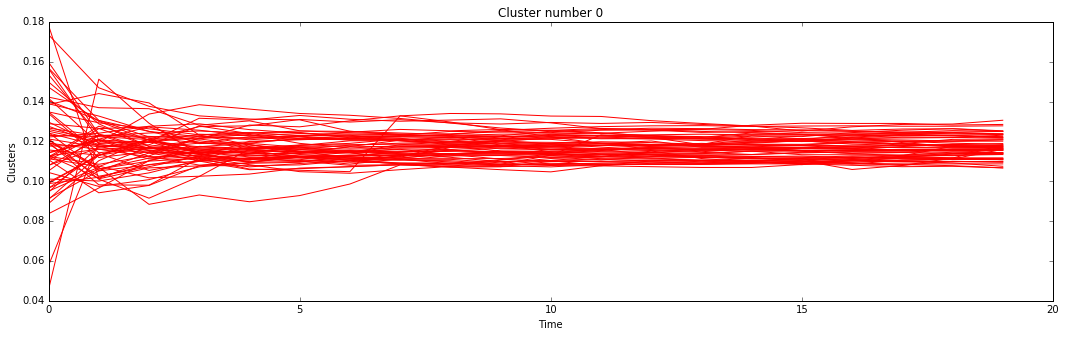

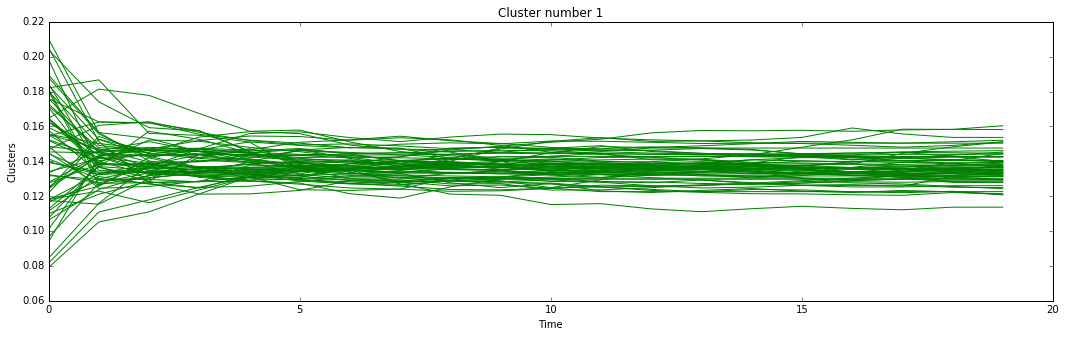

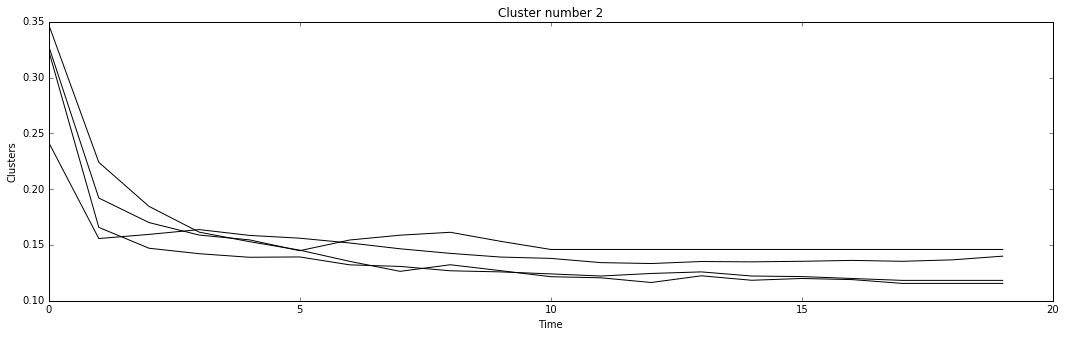

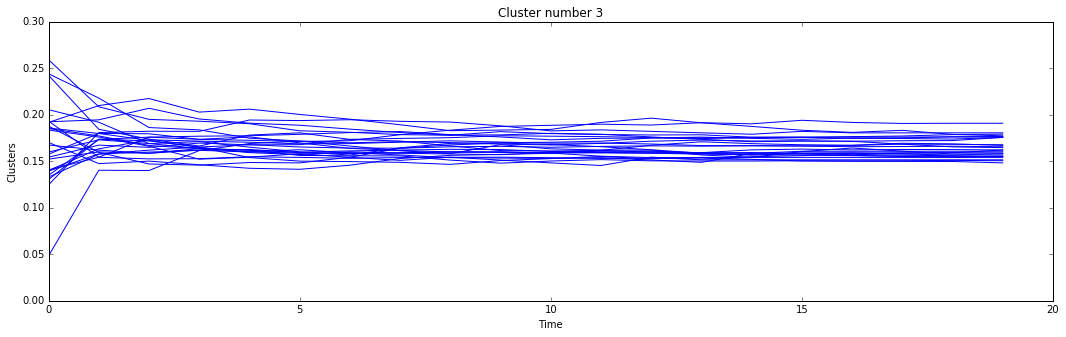

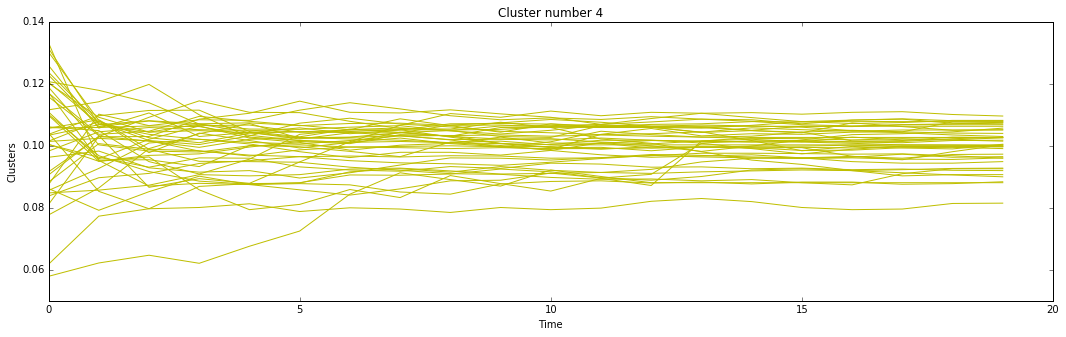

In [253]:
#draw each cluster
numToColor = ['r-', 'g-', 'k-', 'b-', 'y-']
for number_of_cluster in range(n_clusters_en):
    mask= np.where(k_means_labels_en == number_of_cluster)
    pt_0 = pt[mask]

    plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
    clr = numToColor[number_of_cluster]
    for i in range(0,len(pt_0)):
        plt.plot(pt_0[i], clr, label = 'Label')    
    plt.xlabel('Time')
    plt.ylabel('Clusters')
    plt.title('Cluster number ' + str(number_of_cluster))
    print(len(pt_0))


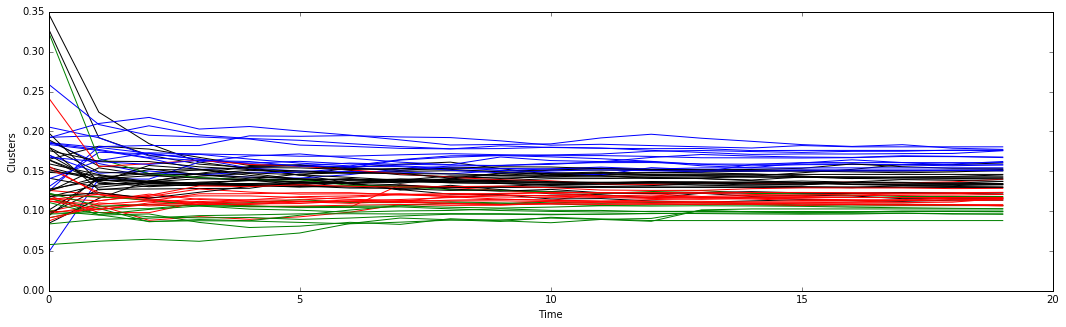

In [219]:
n_clusters_en = 3

k_means_en2 = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
t0 = time.time()
k_means_en2.fit(pt_0)
t_batch = time.time() - t0

k_means_labels_en2 = k_means_en2.labels_
k_means_cluster_centers_en2 = k_means_en2.cluster_centers_
k_means_labels_unique_en2 = np.unique(k_means_labels_en2)


# Plot result

fig = plt.figure(figsize=(3, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.



# # KMeans
# ax = fig.add_subplot(1, 3, 1)
# for k, col in zip(range(n_clusters_en), colors):
#     my_members = k_means_labels_en == k
#     cluster_center = k_means_cluster_centers_en[k]
#     ax.plot(pt[my_members, 0], pt[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
#     ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=6)
# ax.set_title('KMeans')
# ax.set_xticks(())
# ax.set_yticks(())
# plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
#     t_batch, k_means_en.inertia_))





plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt_0)):
    if k_means_labels_en[i] == 0:
        clr = 'r-'

    if k_means_labels_en[i] == 1:
        clr = 'b-'
        
    if k_means_labels_en[i] == 2:
        clr = 'g-'
        
    if k_means_labels_en[i] == 3:
        clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')

#PLEASE STOP HERE